In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
# Open collected dataset
df = pd.read_csv("dataset_1_collected_data.csv")
df.head()

,id,title,budget,revenue,genres,runtime,release_date,production_companies,production_countries,cast,director,vote_average,vote_count,popularity,original_language
0,950387,A Minecraft Movie,150000000,10550000,"['Family', 'Comedy', 'Adventure', 'Fantasy']",101,2025-03-31,"['Warner Bros. Pictures', 'Legendary Pictures'...","['Sweden', 'United States of America']","['Jason Momoa', 'Jack Black', 'Sebastian Eugen...",Jared Hess,5.869,126,681.3142,en
1,1229730,Carjackers,0,0,"['Action', 'Adventure']",97,2025-03-27,['Gaumont'],['France'],"['Zoé Marchal', 'Franck Gastambide', 'Bosh', '...",Kamel Guemra,7.130,46,408.9213,fr
2,1125899,Cleaner,0,0,"['Action', 'Thriller']",96,2025-02-19,"['Anton', 'Qwerty Films']",['United Kingdom'],"['Daisy Ridley', 'Clive Owen', 'Taz Skylar', '...",Martin Campbell,6.750,152,355.3781,en
3,1197306,A Working Man,40000000,33392248,"['Action', 'Crime', 'Thriller']",116,2025-03-26,"['Cedar Park Entertainment', 'BlockFilm', 'Pun...","['United Kingdom', 'United States of America']","['Jason Statham', 'David Harbour', 'Michael Pe...",David Ayer,6.900,109,352.8585,en
4,1261050,The Quiet Ones,0,0,"['Action', 'Drama']",110,2024-10-31,"['Zentropa Entertainments', 'Film i Väst', 'Ze...","['Denmark', 'Sweden', 'France']","['Gustav Dyekjær Giese', 'Reda Kateb', 'Amanda...",Frederik Louis Hviid,5.941,17,297.9343,da


**Outliers**
**df.describe()**

In [164]:
# Check null values
df.isnull().sum()

id                       0
title                    0
budget                   0
revenue                  0
genres                   0
runtime                  0
release_date            22
production_companies     0
production_countries     0
cast                     0
director                69
vote_average             0
vote_count               0
popularity               0
original_language        0
dtype: int64

In [165]:
# Drop rows with null values 
df = df.dropna(subset=['release_date', 'director'])


In [166]:
# Check zero values
zero_counts = (df == 0).sum()
zero_counts

id                         0
title                      0
budget                  4690
revenue                 4347
genres                     0
runtime                  141
release_date               0
production_companies       0
production_countries       0
cast                       0
director                   0
vote_average             267
vote_count               263
popularity                 0
original_language          0
dtype: int64

In [167]:
# Drop rows with zero values
df = df[(df['budget'] > 0) & (df['revenue'] > 0) & (df['runtime'] > 0) & (df['vote_average'] > 0) & (df['vote_count'] > 0)]

In [168]:
# Check duplicates
df.duplicated().sum()

92

In [169]:
# Drop duplicates
df = df.drop_duplicates(keep='first')

In [170]:
# Statistics description 
df.describe()

,id,budget,revenue,runtime,vote_average,vote_count,popularity
count,4.602000e+03,4.602000e+03,4.602000e+03,4602.000000,4602.000000,4602.000000,4602.000000
mean,1.978788e+05,4.175316e+07,1.332380e+08,112.025858,6.705260,3401.349631,6.217833
std,2.909427e+05,4.982173e+07,2.163563e+08,21.770363,0.773049,4179.364759,15.093299
min,5.000000e+00,5.000000e+00,1.000000e+00,24.000000,1.000000,1.000000,0.817300
25%,8.548000e+03,9.500000e+06,1.799009e+07,97.000000,6.200000,966.000000,2.497525
50%,2.295050e+04,2.500000e+07,5.856049e+07,108.000000,6.708500,1938.000000,3.714050
75%,3.378998e+05,5.500000e+07,1.561075e+08,123.000000,7.256000,4100.500000,6.424575
max,1.380415e+06,4.600000e+08,2.923706e+09,254.000000,8.707000,37286.000000,681.314200


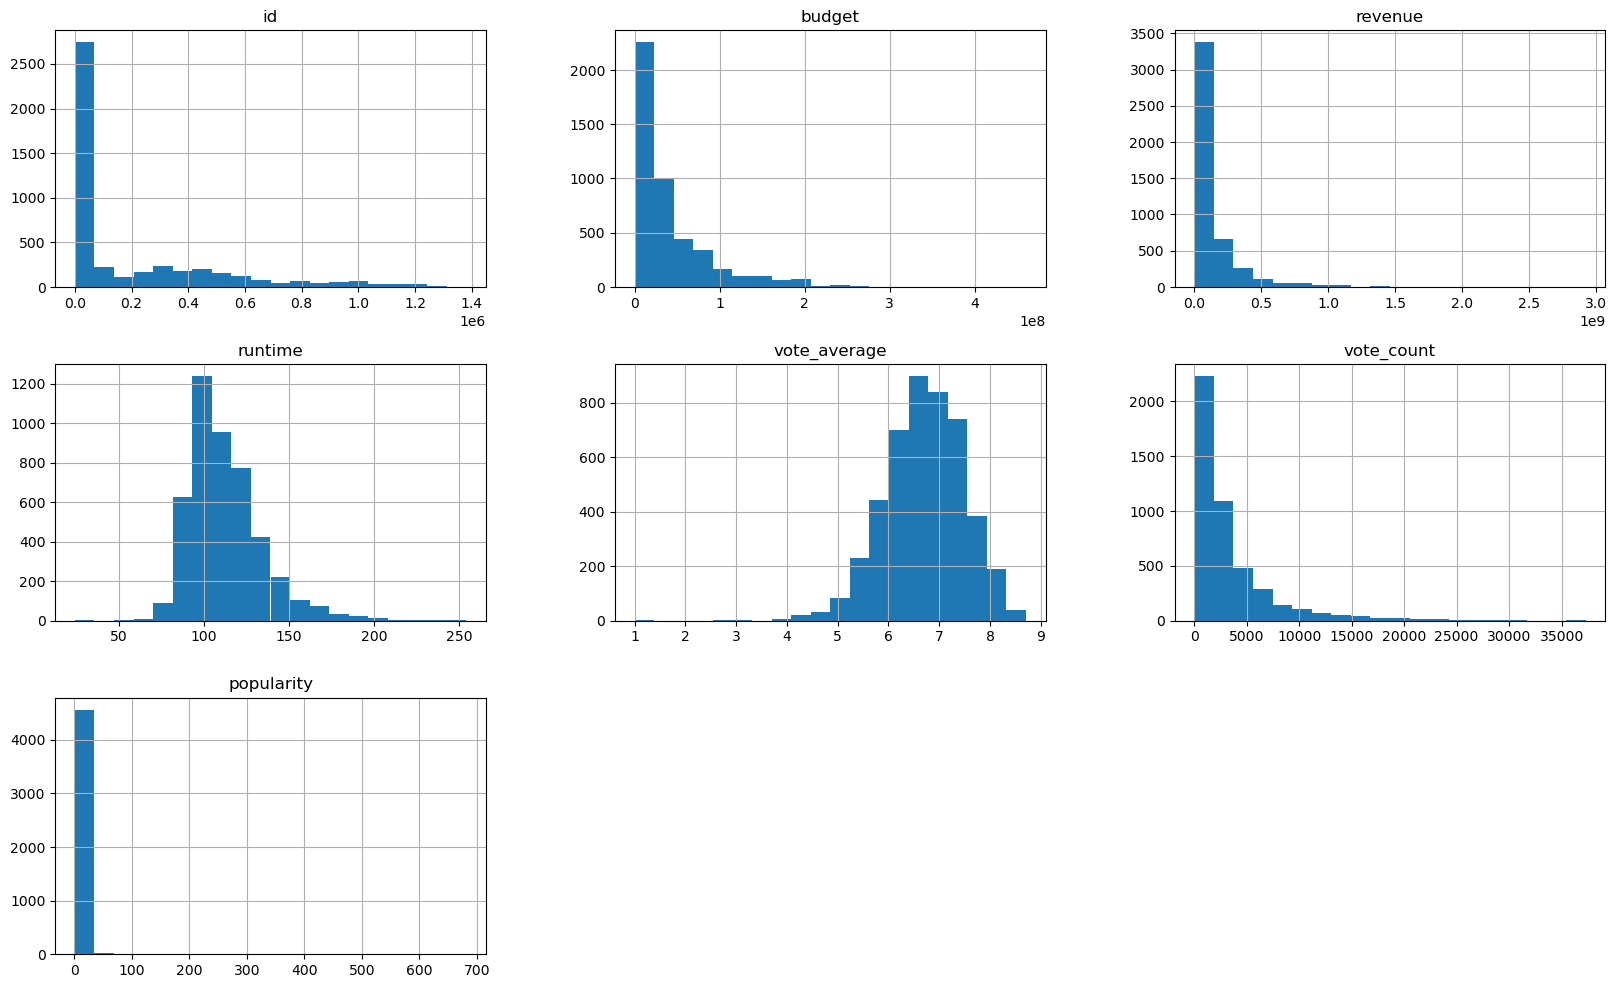

In [171]:
# Dataset's distribution
df.hist(bins=20, figsize=(20, 12))
plt.show()

Outliers Handling for Budget

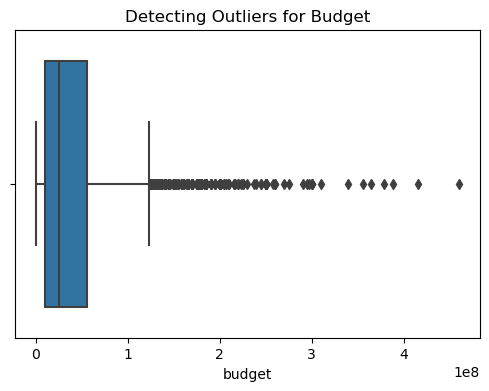

In [172]:
# Boxplot for outliers in budget column
plt.figure(figsize=(6,4))
sns.boxplot(x=df['budget'])
plt.title("Detecting Outliers for Budget")
plt.show()

In [173]:
# Z-score method for outlier detect
from scipy.stats import zscore

df['z_scores'] = zscore(df['budget'])

outliers = df[df['z_scores'].abs() > 3]
outliers.sort_values(by='budget')

,id,title,budget,revenue,genres,runtime,release_date,production_companies,production_countries,cast,director,vote_average,vote_count,popularity,original_language,z_scores
5232,38356,Transformers: Dark of the Moon,195000000,1123794079,"['Action', 'Science Fiction', 'Adventure']",154,2011-06-28,"['Paramount Pictures', 'di Bonaventura Picture...",['United States of America'],"['Shia LaBeouf', 'Rosie Huntington-Whiteley', ...",Michael Bay,6.208,8446,2.9987,en,3.076238
1476,81005,Jack the Giant Slayer,195000000,197700000,"['Fantasy', 'Action', 'Adventure', 'Drama']",114,2013-02-27,"['New Line Cinema', 'Legendary Pictures', 'Ori...","['United States of America', 'United Kingdom']","['Nicholas Hoult', 'Eleanor Tomlinson', 'Ewan ...",Bryan Singer,5.849,4964,7.0080,en,3.076238
539,889737,Joker: Folie à Deux,195000000,206400287,"['Drama', 'Crime', 'Thriller']",138,2024-10-01,"['Warner Bros. Pictures', 'Joint Effort', 'Dom...",['United States of America'],"['Joaquin Phoenix', 'Lady Gaga', 'Brendan Glee...",Todd Phillips,5.465,2257,13.7201,en,3.076238
211,667538,Transformers: Rise of the Beasts,195000000,441381193,"['Science Fiction', 'Adventure', 'Action']",127,2023-06-06,"['Skydance Media', 'Paramount Pictures', 'di B...",['United States of America'],"['Anthony Ramos', 'Dominique Fishback', 'Peter...",Steven Caple Jr.,7.246,4856,20.8501,en,3.076238
10,762509,Mufasa: The Lion King,200000000,721046090,"['Adventure', 'Family', 'Animation']",118,2024-12-18,['Walt Disney Pictures'],['United States of America'],"['Aaron Pierre', 'Kelvin Harrison, Jr.', 'Tiff...",Barry Jenkins,7.446,1851,176.5402,en,3.176607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,99861,Avengers: Age of Ultron,365000000,1405403694,"['Action', 'Adventure', 'Science Fiction']",141,2015-04-22,['Marvel Studios'],['United States of America'],"['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...",Joss Whedon,7.271,23335,18.3995,en,6.488774
432,1865,Pirates of the Caribbean: On Stranger Tides,379000000,1046721266,"['Adventure', 'Action', 'Fantasy']",136,2011-05-15,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...","['United Kingdom', 'United States of America']","['Johnny Depp', 'Penélope Cruz', 'Geoffrey Rus...",Rob Marshall,6.557,14232,15.3397,en,6.769807
752,640146,Ant-Man and the Wasp: Quantumania,388369742,476071180,"['Action', 'Adventure', 'Science Fiction']",125,2023-02-15,"['Marvel Studios', 'Kevin Feige Productions']",['United States of America'],"['Paul Rudd', 'Evangeline Lilly', 'Michael Dou...",Peyton Reed,6.294,5209,9.0345,en,6.957893
917,181812,Star Wars: The Rise of Skywalker,416000000,1074144248,"['Adventure', 'Action', 'Science Fiction']",142,2019-12-18,"['Lucasfilm Ltd.', 'Bad Robot']",['United States of America'],"['Carrie Fisher', 'Mark Hamill', 'Daisy Ridley...",J.J. Abrams,6.301,10117,8.9193,en,7.512535


In [174]:
# IQR method for outlier detect
Q1 = df['budget'].quantile(0.25)
Q3 = df['budget'].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = df[(df['budget'] < (Q1 - 1.5 * IQR)) | (df['budget'] > (Q1 + 1.5 * IQR))]
outliers_iqr

,id,title,budget,revenue,genres,runtime,release_date,production_companies,production_countries,cast,director,vote_average,vote_count,popularity,original_language,z_scores
0,950387,A Minecraft Movie,150000000,10550000,"['Family', 'Comedy', 'Adventure', 'Fantasy']",101,2025-03-31,"['Warner Bros. Pictures', 'Legendary Pictures'...","['Sweden', 'United States of America']","['Jason Momoa', 'Jack Black', 'Sebastian Eugen...",Jared Hess,5.869,126,681.3142,en,2.172919
5,822119,Captain America: Brave New World,180000000,409278201,"['Action', 'Thriller', 'Science Fiction']",119,2025-02-12,"['Marvel Studios', 'Kevin Feige Productions']",['United States of America'],"['Anthony Mackie', 'Harrison Ford', 'Danny Ram...",Julius Onah,6.118,1204,308.3292,en,2.775132
10,762509,Mufasa: The Lion King,200000000,721046090,"['Adventure', 'Family', 'Animation']",118,2024-12-18,['Walt Disney Pictures'],['United States of America'],"['Aaron Pierre', 'Kelvin Harrison, Jr.', 'Tiff...",Barry Jenkins,7.446,1851,176.5402,en,3.176607
13,1241982,Moana 2,150000000,1059544057,"['Animation', 'Adventure', 'Family', 'Comedy']",99,2024-11-21,"['Walt Disney Pictures', 'Walt Disney Animatio...","['Canada', 'United States of America']","['Auliʻi Cravalho', 'Dwayne Johnson', 'Hualāla...",David G. Derrick Jr.,7.109,2133,173.9289,en,2.172919
16,447273,Snow White,270000000,147200161,"['Family', 'Fantasy']",109,2025-03-19,"['Walt Disney Pictures', 'Marc Platt Productio...",['United States of America'],"['Rachel Zegler', 'Gal Gadot', 'Andrew Burnap'...",Marc Webb,4.538,483,158.5135,en,4.581769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9721,1639,Speed 2: Cruise Control,160000000,164508066,"['Action', 'Adventure', 'Thriller']",125,1997-06-13,"['Blue Tulip Productions', '20th Century Fox']",['United States of America'],"['Sandra Bullock', 'Jason Patric', 'Willem Daf...",Jan de Bont,4.600,1667,2.0835,en,2.373657
9727,9447,Babe: Pig in the City,90000000,69100000,"['Family', 'Adventure', 'Comedy', 'Drama']",96,1998-11-25,"['Kennedy Miller Productions', 'Universal Pict...","['Australia', 'United States of America']","['E. G. Daily', 'Magda Szubanski', 'James Crom...",George Miller,5.600,1251,1.9416,en,0.968495
9771,1408,Cutthroat Island,98000000,16000000,"['Action', 'Adventure']",124,1995-12-22,"['Carolco Pictures', 'Forge', 'Laurence Mark P...","['France', 'Germany', 'Italy', 'United States ...","['Geena Davis', 'Matthew Modine', 'Frank Lange...",Renny Harlin,5.783,566,2.1158,en,1.129085
9865,12193,Four Christmases,80000000,164112721,"['Comedy', 'Romance', 'Drama']",88,2008-11-26,"['Spyglass Entertainment', 'Wild West Picture ...",['United States of America'],"['Vince Vaughn', 'Reese Witherspoon', 'Robert ...",Seth Gordon,5.799,1167,1.8393,en,0.767757


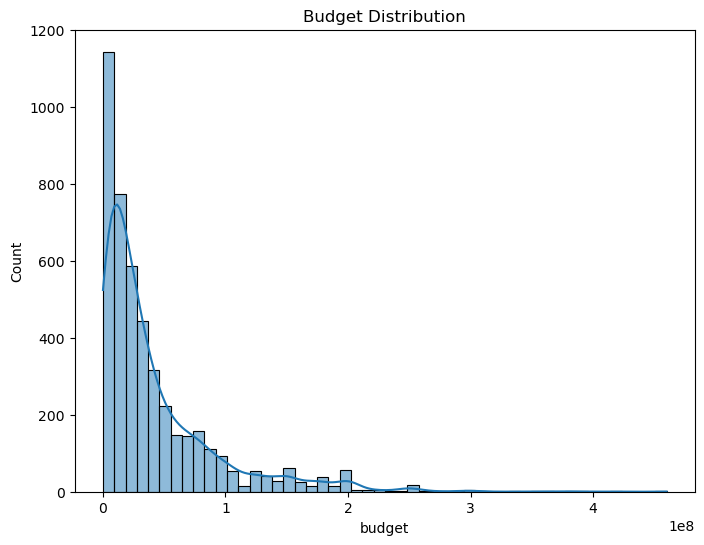

In [175]:
# Plot histogram for Budget Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['budget'], bins=50, kde=True)
plt.title("Budget Distribution")
plt.show()

In [176]:
# Check very small budget values
df.sort_values(by='budget').head(10)

,id,title,budget,revenue,genres,runtime,release_date,production_companies,production_countries,cast,director,vote_average,vote_count,popularity,original_language,z_scores
5366,14424,Sex and Death 101,5,1,"['Comedy', 'Romance', 'Drama']",117,2007-06-15,"['Avenue Pictures', 'Sandbar Pictures']",['United States of America'],"['Simon Baker', 'Winona Ryder', 'Julie Bowen',...",Daniel Waters,6.200,285,3.1521,en,-0.838142
9189,174008,My Brother's War,40,300,"['War', 'History', 'Drama', 'Romance']",115,2005-09-01,[],[],[],Whitney Hamilton,1.000,1,0.9190,en,-0.838141
6595,38780,Rampage,120,428,"['Action', 'Crime', 'Thriller', 'Horror']",85,2009-09-27,"['Boll Kino Beteiligungs GmbH & Co. KG', 'Brig...","['Canada', 'Germany']","['Brendan Fletcher', 'Shaun Sipos', 'Michael P...",Uwe Boll,5.949,440,2.1455,en,-0.838140
5132,539892,Freaks,2000,368410,['Science Fiction'],105,2019-09-12,"['Amazing Incorporated', 'My Way Entertainment...","['Canada', 'United States of America']","['Emile Hirsch', 'Bruce Dern', 'Grace Park', '...",Adam B. Stein,6.750,1167,2.3344,en,-0.838102
4973,14337,Primer,7000,545436,"['Science Fiction', 'Drama', 'Thriller']",77,2004-10-08,['erbp'],['United States of America'],"['Shane Carruth', 'David Sullivan', 'Casey Goo...",Shane Carruth,6.766,2211,3.7562,en,-0.838002
5888,9367,El Mariachi,7225,2040920,"['Action', 'Crime', 'Thriller', 'Western']",81,1993-02-22,['Los Hooligans Productions'],['United States of America'],"['Carlos Gallardo', 'Consuelo Gómez', 'Jaime d...",Robert Rodriguez,6.728,1155,2.3159,es,-0.837997
4557,951546,Reign of Chaos,10000,100,"['Action', 'Horror', 'Fantasy']",77,2022-04-12,['Proportion Productions'],['United Kingdom'],"['Rebecca Finch', 'Ray Whelan', 'Kate Milner E...",Becca Hirani,5.500,42,3.1671,en,-0.837941
8051,692,Pink Flamingos,12000,6000000,"['Comedy', 'Crime']",93,1972-03-17,['Dreamland'],['United States of America'],"['Divine', 'David Lochary', 'Mary Vivian Pearc...",John Waters,6.200,504,2.1790,en,-0.837901
3369,525686,My Cousin the Sexologist,15000,35749,"['Comedy', 'Drama']",104,2016-07-20,['Miguel Chavez & Asoc.'],['Bolivia'],"['Stephanie Herela', 'Andrés Salvatierra', 'Ma...",Miguel Chávez,6.779,507,4.3795,es,-0.837841
7568,994143,Skinamarink,15000,2100000,['Horror'],100,2023-01-13,['ERO Picture Company'],['Canada'],"['Lucas Paul', 'Dali Rose Tetreault', 'Ross Pa...",Kyle Edward Ball,5.427,300,2.1527,en,-0.837841


In [177]:
# Remove less than 100,000$ budget values
min_value = 100000

(df['budget'] < min_value).sum()

29

In [178]:
df = df[df['budget'] >= min_value]

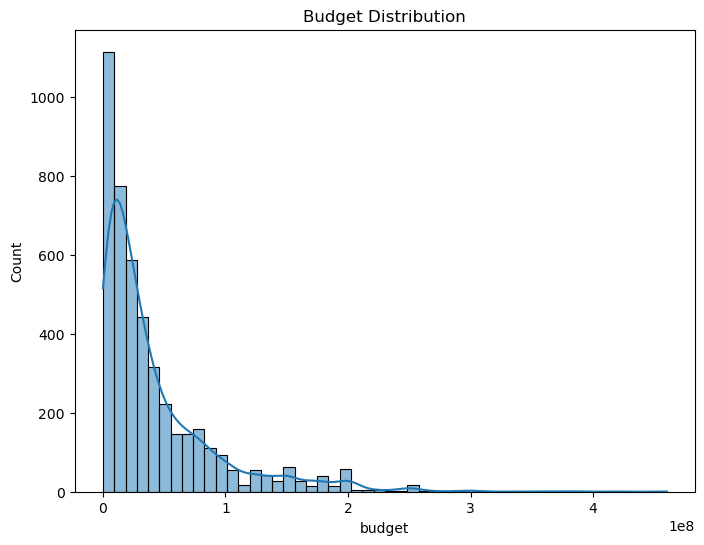

In [179]:
plt.figure(figsize=(8, 6))
sns.histplot(df['budget'], bins=50, kde=True)
plt.title("Budget Distribution")
plt.show()

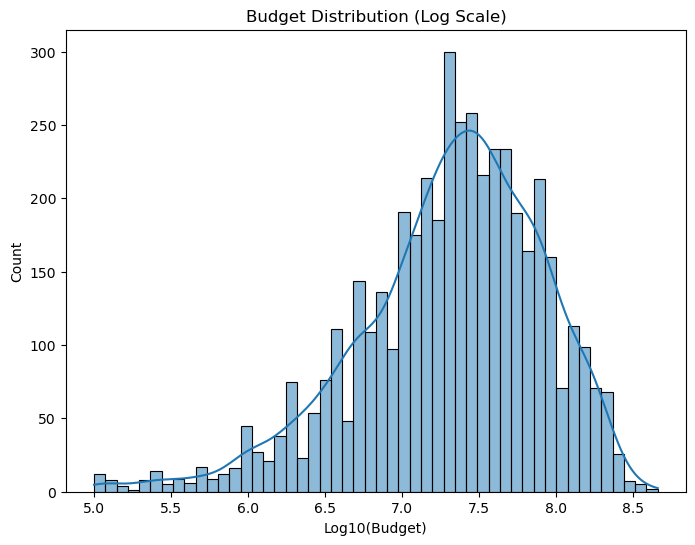

In [180]:
# Log Scale Budget Distribution
plt.figure(figsize=(8, 6))
sns.histplot(np.log10(df['budget']), bins=50, kde=True)
plt.xlabel("Log10(Budget)")
plt.title("Budget Distribution (Log Scale)")
plt.show()

Outliers Handling for Revenue

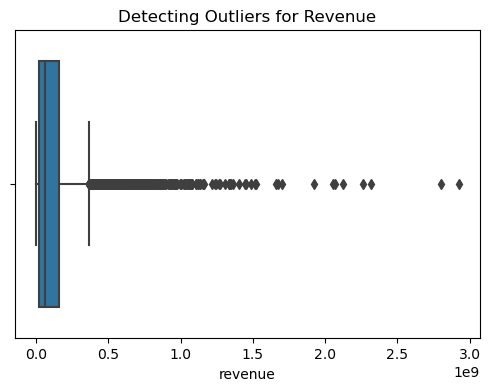

In [181]:
# Boxplot for outliers in revenue column
plt.figure(figsize=(6,4))
sns.boxplot(x=df['revenue'])
plt.title("Detecting Outliers for Revenue")
plt.show()

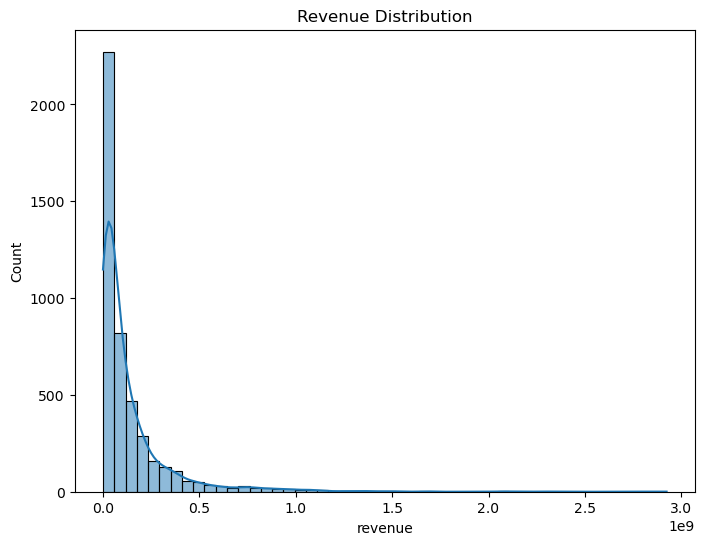

In [182]:
# Plot histogram for Revenue Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['revenue'], bins=50, kde=True)
plt.title("Revenue Distribution")
plt.show()

In [183]:
# Z-score method for outlier detect
from scipy.stats import zscore

df['z_scores'] = zscore(df['revenue'])

outliers = df[df['z_scores'].abs() > 3]
outliers.sort_values(by='revenue')

,id,title,budget,revenue,genres,runtime,release_date,production_companies,production_countries,cast,director,vote_average,vote_count,popularity,original_language,z_scores
778,383498,Deadpool 2,110000000,785896632,"['Action', 'Comedy', 'Adventure']",120,2018-05-15,"['Maximum Effort', 'Genre Films', '20th Centur...",['United States of America'],"['Ryan Reynolds', 'Josh Brolin', 'Morena Bacca...",David Leitch,7.489,18292,10.4536,en,3.007298
1442,217,Indiana Jones and the Kingdom of the Crystal S...,185000000,786636033,"['Adventure', 'Action']",122,2008-05-21,"['Paramount Pictures', 'Lucasfilm Ltd.']",['United States of America'],"['Harrison Ford', 'Cate Blanchett', 'Karen All...",Steven Spielberg,6.008,8468,7.7741,en,3.010709
1300,558,Spider-Man 2,200000000,788976453,"['Action', 'Adventure', 'Science Fiction']",127,2004-06-25,"['Marvel Enterprises', 'Laura Ziskin Productio...",['United States of America'],"['Tobey Maguire', 'Kirsten Dunst', 'James Fran...",Sam Raimi,7.289,15401,7.1896,en,3.021506
217,673,Harry Potter and the Prisoner of Azkaban,130000000,789804554,"['Adventure', 'Fantasy']",141,2004-05-31,"['Warner Bros. Pictures', '1492 Pictures', 'He...","['United Kingdom', 'United States of America']","['Daniel Radcliffe', 'Rupert Grint', 'Emma Wat...",Alfonso Cuarón,8.011,22011,23.7024,en,3.025326
521,14161,2012,200000000,791217826,"['Action', 'Adventure', 'Science Fiction']",158,2009-10-10,"['Columbia Pictures', 'Centropolis Entertainme...",['United States of America'],"['John Cusack', 'Amanda Peet', 'Chiwetel Ejiof...",Roland Emmerich,5.849,12100,13.1948,en,3.031846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,980477,Ne Zha 2,80000000,2123000000,"['Animation', 'Fantasy', 'Adventure']",144,2025-01-29,"['Chengdu Coco Cartoon', 'Beijing Enlight Pict...",['China'],"['Lu Yanting', 'Joseph', 'Han Mo', 'Chen Hao',...",Yang Yu,7.800,145,26.1666,zh,9.175711
128,597,Titanic,200000000,2264162353,"['Drama', 'Romance']",194,1997-11-18,"['Paramount Pictures', '20th Century Fox', 'Li...",['United States of America'],"['Leonardo DiCaprio', 'Kate Winslet', 'Billy Z...",James Cameron,7.906,25853,31.0524,en,9.826931
162,76600,Avatar: The Way of Water,460000000,2320250281,"['Science Fiction', 'Adventure', 'Action']",192,2022-12-14,"['20th Century Studios', 'Lightstorm Entertain...",['United States of America'],"['Sam Worthington', 'Zoe Saldaña', 'Sigourney ...",James Cameron,7.607,12423,26.7280,en,10.085679
205,299534,Avengers: Endgame,356000000,2799439100,"['Adventure', 'Science Fiction', 'Action']",181,2019-04-24,['Marvel Studios'],['United States of America'],"['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...",Joe Russo,8.200,26195,21.8941,en,12.296305


In [184]:
# IQR method for outlier detect
Q1 = df['revenue'].quantile(0.25)
Q3 = df['revenue'].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = df[(df['revenue'] < (Q1 - 1.5 * IQR)) | (df['revenue'] > (Q1 + 1.5 * IQR))]
outliers_iqr

,id,title,budget,revenue,genres,runtime,release_date,production_companies,production_countries,cast,director,vote_average,vote_count,popularity,original_language,z_scores
5,822119,Captain America: Brave New World,180000000,409278201,"['Action', 'Thriller', 'Science Fiction']",119,2025-02-12,"['Marvel Studios', 'Kevin Feige Productions']",['United States of America'],"['Anthony Mackie', 'Harrison Ford', 'Danny Ram...",Julius Onah,6.118,1204,308.3292,en,1.269857
10,762509,Mufasa: The Lion King,200000000,721046090,"['Adventure', 'Family', 'Animation']",118,2024-12-18,['Walt Disney Pictures'],['United States of America'],"['Aaron Pierre', 'Kelvin Harrison, Jr.', 'Tiff...",Barry Jenkins,7.446,1851,176.5402,en,2.708125
13,1241982,Moana 2,150000000,1059544057,"['Animation', 'Adventure', 'Family', 'Comedy']",99,2024-11-21,"['Walt Disney Pictures', 'Walt Disney Animatio...","['Canada', 'United States of America']","['Auliʻi Cravalho', 'Dwayne Johnson', 'Hualāla...",David G. Derrick Jr.,7.109,2133,173.9289,en,4.269706
19,939243,Sonic the Hedgehog 3,122000000,486018457,"['Action', 'Science Fiction', 'Comedy', 'Famil...",110,2024-12-19,"['Paramount Pictures', 'Original Film', 'Marza...","['United States of America', 'Japan']","['Jim Carrey', 'Ben Schwartz', 'Keanu Reeves',...",Jeff Fowler,7.800,2325,133.9372,en,1.623880
34,912649,Venom: The Last Dance,120000000,478103649,"['Action', 'Science Fiction', 'Adventure']",109,2024-10-22,"['Columbia Pictures', 'Pascal Pictures', 'Matt...",['United States of America'],"['Tom Hardy', 'Chiwetel Ejiofor', 'Juno Temple...",Kelly Marcel,6.785,3124,73.7027,en,1.587367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8808,960876,Dunki,239000000,501000000,"['Adventure', 'Comedy', 'Drama']",159,2023-12-21,"['Red Chillies Entertainment', 'Rajkumar Hiran...",['India'],"['Shah Rukh Khan', 'Taapsee Pannu', 'Vikram Ko...",Rajkumar Hirani,6.200,79,2.1217,hi,1.692994
8849,1934,Shakespeare in Love,25000000,289300000,"['Romance', 'History', 'Comedy']",123,1998-12-11,"['Miramax', 'Universal Pictures', 'Bedford Fal...",['United States of America'],"['Joseph Fiennes', 'Gwyneth Paltrow', 'Geoffre...",John Madden,6.859,3036,2.0038,en,0.716366
9460,12289,Red Cliff,80341000,250100000,"['Adventure', 'Drama', 'History', 'Action', 'W...",145,2008-07-10,"['Lion Rock Productions', 'Showbox', 'Beijing ...","['China', 'Hong Kong', 'Japan', 'South Korea',...","['Tony Leung', 'Takeshi Kaneshiro', 'Zhang Fen...",John Woo,7.100,827,2.1349,zh,0.535526
9544,8265,Welcome to the Sticks,11000000,245144417,"['Comedy', 'Drama', 'Romance']",106,2008-02-20,"['TF1 Films Production', 'Hirsch', 'Les Produc...",['France'],"['Kad Merad', 'Dany Boon', 'Zoé Félix', 'Loren...",Dany Boon,6.700,2448,1.7838,fr,0.512664


In [185]:
# Check small values for revenue
df.sort_values(by='revenue').head(10)


,id,title,budget,revenue,genres,runtime,release_date,production_companies,production_countries,cast,director,vote_average,vote_count,popularity,original_language,z_scores
1616,966220,Sniper: The White Raven,1000000,881,"['War', 'Action', 'Drama']",120,2022-05-03,['UM Group'],['Ukraine'],"['Pavlo Aldoshyn', 'Maryna Koshkina', 'Andrii ...",Marian Bushan,7.600,800,6.3504,uk,-0.618248
1658,906126,Society of the Snow,65500000,1281,"['Drama', 'History']",144,2023-12-15,"['El Arriero Films', 'Misión de Audaces Films'...","['Spain', 'United States of America']","['Enzo Vogrincic', 'Agustín Pardella', 'Matías...",J.A. Bayona,8.002,3122,7.1768,es,-0.618246
2073,15255,Undisputed II: Last Man Standing,8000000,1361,"['Action', 'Crime', 'Thriller', 'Drama']",93,2006-04-11,"['Nu Image Bulgaria', 'Millennium Media']",['United States of America'],"['Michael Jai White', 'Scott Adkins', 'Ben Cro...",Isaac Florentine,7.321,829,5.6845,en,-0.618246
9892,517991,The Spy Gone North,17000000,3175,"['Drama', 'History', 'Thriller']",138,2018-08-08,"['Sanai Pictures', 'Moonlight Film', 'CJ Enter...",['South Korea'],"['Hwang Jung-min', 'Lee Sung-min', 'Cho Jin-wo...",Yoon Jong-bin,7.385,195,1.9626,ko,-0.618237
3195,10947,High School Musical,4200000,3746,"['Comedy', 'Drama', 'Family', 'Music', 'Romanc...",98,2006-01-20,"['Salty Pictures', 'First Street Films']",['United States of America'],"['Zac Efron', 'Vanessa Hudgens', 'Ashley Tisda...",Kenny Ortega,6.548,4610,4.0251,en,-0.618235
6458,524659,Crown Vic,3600000,3868,"['Crime', 'Drama', 'Action']",110,2019-11-01,"['Brittany House Pictures', 'BondIt Media Capi...","['Taiwan', 'United States of America']","['Thomas Jane', 'Luke Kleintank', 'Josh Hopkin...",Joel Souza,6.200,200,1.8976,en,-0.618234
9796,397415,Vengeance: A Love Story,7500000,4526,"['Action', 'Drama', 'Thriller']",99,2017-03-16,"['Hannibal Classics', 'Patriot Pictures', 'Jus...",['United States of America'],"['Nicolas Cage', 'Anna Hutchison', 'Talitha El...",Johnny Martin,5.500,313,1.6720,en,-0.618231
7091,447665,Kickboxer: Retaliation,13000000,4537,"['Action', 'Drama']",110,2018-01-26,"['Our House Films', 'Head Gear Films', 'Metrol...",['United States of America'],"['Alain Moussi', 'Christopher Lambert', 'Jean-...",Dimitri Logothetis,5.400,302,2.2667,en,-0.618231
131,1255788,The Gardener,10000000,4772,"['Action', 'Comedy']",110,2025-01-30,"['uMedia', 'Rose Productions']","['Belgium', 'France']","['Jean-Claude Van Damme', 'Michaël Youn', 'Naw...",David Charhon,6.300,119,29.7153,fr,-0.618230
533,763215,Damsel,60000000,5000,"['Fantasy', 'Action', 'Adventure']",107,2024-03-07,"['PCMA Productions', 'Roth-Kirschenbaum Films'...","['Spain', 'United States of America']","['Millie Bobby Brown', 'Ray Winstone', 'Angela...",Juan Carlos Fresnadillo,7.027,2382,12.9790,en,-0.618229


In [186]:
# Remove less than $100,000 values from revenue
(df['revenue'] < min_value).sum()

44

In [187]:
df = df[df['revenue'] >= min_value]

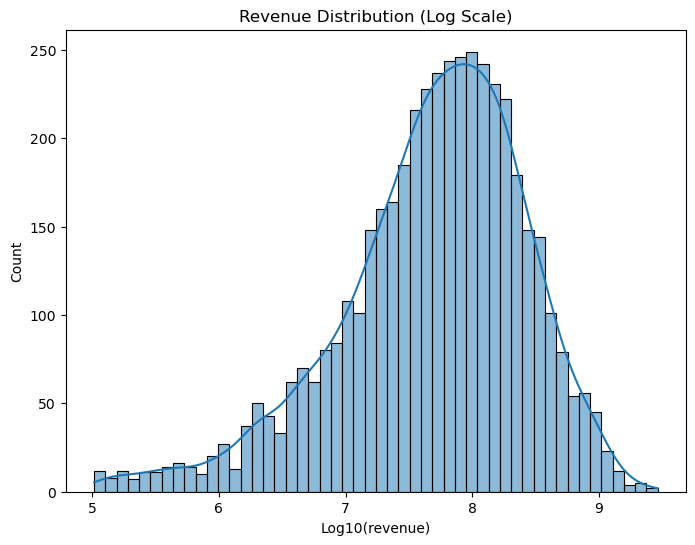

In [188]:
# Revenue Distribution (Log Scale)
plt.figure(figsize=(8, 6))
sns.histplot(np.log10(df['revenue']), bins=50, kde=True)
plt.xlabel("Log10(revenue)")
plt.title("Revenue Distribution (Log Scale)")
plt.show()

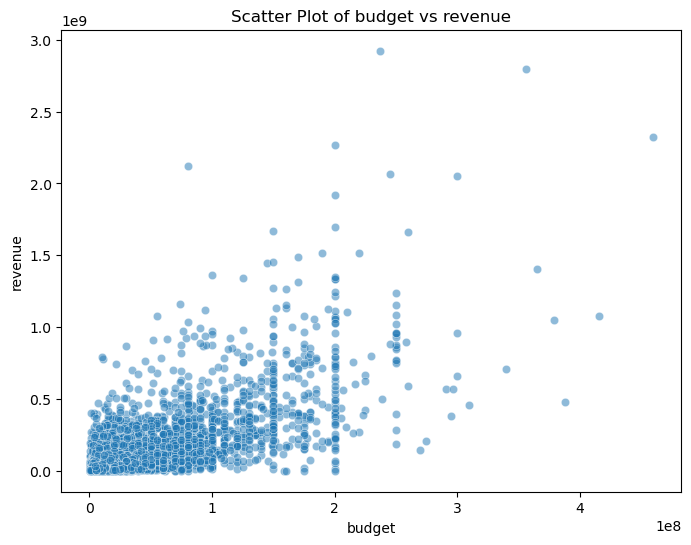

In [189]:
# Scatterplot for budget vs revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["budget"], y=df["revenue"], alpha=0.5)
plt.xlabel("budget")
plt.ylabel("revenue")
plt.title("Scatter Plot of budget vs revenue")
plt.show()

In [190]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4529 entries, 0 to 9996
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4529 non-null   int64  
 1   title                 4529 non-null   object 
 2   budget                4529 non-null   int64  
 3   revenue               4529 non-null   int64  
 4   genres                4529 non-null   object 
 5   runtime               4529 non-null   int64  
 6   release_date          4529 non-null   object 
 7   production_companies  4529 non-null   object 
 8   production_countries  4529 non-null   object 
 9   cast                  4529 non-null   object 
 10  director              4529 non-null   object 
 11  vote_average          4529 non-null   float64
 12  vote_count            4529 non-null   int64  
 13  popularity            4529 non-null   float64
 14  original_language     4529 non-null   object 
 15  z_scores              4529

In [191]:
# extract year and month
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4529 entries, 0 to 9996
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    4529 non-null   int64         
 1   title                 4529 non-null   object        
 2   budget                4529 non-null   int64         
 3   revenue               4529 non-null   int64         
 4   genres                4529 non-null   object        
 5   runtime               4529 non-null   int64         
 6   release_date          4529 non-null   datetime64[ns]
 7   production_companies  4529 non-null   object        
 8   production_countries  4529 non-null   object        
 9   cast                  4529 non-null   object        
 10  director              4529 non-null   object        
 11  vote_average          4529 non-null   float64       
 12  vote_count            4529 non-null   int64         
 13  popularity            4

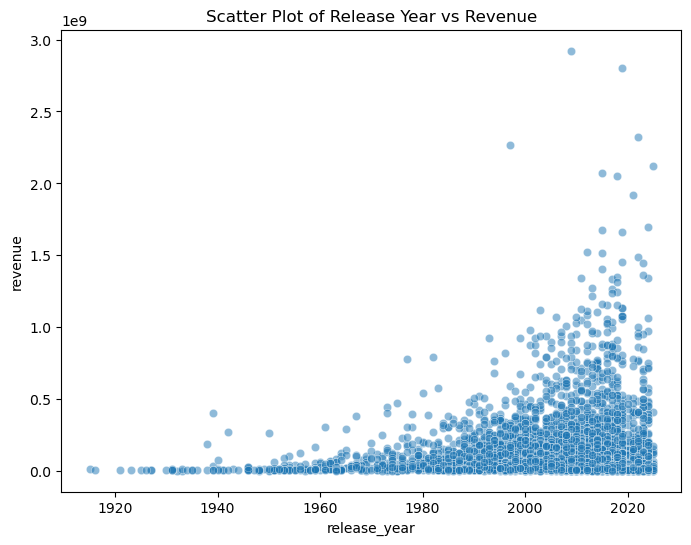

In [192]:
# Scatter Plot of Release Year vs Revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["release_year"], y=df["revenue"], alpha=0.5)
plt.xlabel("release_year")
plt.ylabel("revenue")
plt.title("Scatter Plot of Release Year vs Revenue")
plt.show()

In [193]:
# select top category for genre
df['main_genre'] = df['genres'].apply(
    lambda x: x.strip("[]").replace("'", "").split(',')[0].strip() if isinstance(x, str) else x)

# for production company
df['main_company'] = df['production_companies'].apply(
    lambda x: x.strip("[]").replace("'", "").split(',')[0].strip() if isinstance(x, str) else x)

top_companies = df['main_company'].value_counts().head(10).index
df['main_company'] = df['main_company'].apply(
    lambda x: x if x in top_companies else 'Other')

# for production country
df['main_country'] = df['production_countries'].apply(
    lambda x: x.strip("[]").replace("'", "").split(',')[0].strip() if isinstance(x, str) else x)

top_country = df['main_country'].value_counts().head(10).index
df['main_country'] = df['main_country'].apply(
    lambda x: x if x in top_country else 'Other')

# for cast
df['main_actor'] = df['cast'].apply(
    lambda x: x.strip("[]").replace("'", "").split(',')[0].strip() if isinstance(x, str) else x)

top_actors = df['main_actor'].value_counts().head(10).index
df['main_actor'] = df['main_actor'].apply(
    lambda x: x if x in top_actors else 'Other')

# for director
top_directors = df['director'].value_counts().head(10).index
df['director'] = df['director'].apply(
    lambda x: x if x in top_directors else 'Other')

# for language
top_languages = df['original_language'].value_counts().head(10).index
df['original_language'] = df['original_language'].apply(
    lambda x: x if x in top_languages else 'Other')

# one-hot encoding
df = pd.get_dummies(df, columns=['main_genre', 'main_company', 'main_country', 'main_actor', 'director', 'original_language'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4529 entries, 0 to 9996
Data columns (total 84 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   id                                     4529 non-null   int64         
 1   title                                  4529 non-null   object        
 2   budget                                 4529 non-null   int64         
 3   revenue                                4529 non-null   int64         
 4   genres                                 4529 non-null   object        
 5   runtime                                4529 non-null   int64         
 6   release_date                           4529 non-null   datetime64[ns]
 7   production_companies                   4529 non-null   object        
 8   production_countries                   4529 non-null   object        
 9   cast                                   4529 non-null   object       

In [194]:
# drop unnecessary columns
df = df.drop(['id', 'title', 'genres', 'release_date', 'production_companies','production_countries', 'cast', 'z_scores'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4529 entries, 0 to 9996
Data columns (total 76 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   budget                                 4529 non-null   int64  
 1   revenue                                4529 non-null   int64  
 2   runtime                                4529 non-null   int64  
 3   vote_average                           4529 non-null   float64
 4   vote_count                             4529 non-null   int64  
 5   popularity                             4529 non-null   float64
 6   release_year                           4529 non-null   int32  
 7   release_month                          4529 non-null   int32  
 8   main_genre_Action                      4529 non-null   bool   
 9   main_genre_Adventure                   4529 non-null   bool   
 10  main_genre_Animation                   4529 non-null   bool   
 11  main_genr

In [195]:
# Sum each genre column 
genre_columns = df.columns[df.columns.str.startswith('main_genre_')]

genre_counts = df[genre_columns].sum().sort_values()

print(genre_counts)

main_genre_Documentary          4
main_genre_Music               29
main_genre_Western             36
main_genre_History             37
main_genre_War                 38
main_genre_Mystery             55
main_genre_Romance            117
main_genre_Family             126
main_genre_Fantasy            133
main_genre_Science Fiction    172
main_genre_Thriller           193
main_genre_Crime              208
main_genre_Animation          226
main_genre_Adventure          344
main_genre_Horror             417
main_genre_Comedy             700
main_genre_Action             834
main_genre_Drama              859
dtype: int64


In [196]:
df.head()

,budget,revenue,runtime,vote_average,vote_count,popularity,release_year,release_month,main_genre_Action,main_genre_Adventure,...,original_language_cn,original_language_en,original_language_es,original_language_fr,original_language_hi,original_language_it,original_language_ja,original_language_ko,original_language_ru,original_language_zh
0,150000000,10550000,101,5.869,126,681.3142,2025,3,False,False,...,False,True,False,False,False,False,False,False,False,False
3,40000000,33392248,116,6.900,109,352.8585,2025,3,True,False,...,False,True,False,False,False,False,False,False,False,False
5,180000000,409278201,119,6.118,1204,308.3292,2025,2,True,False,...,False,True,False,False,False,False,False,False,False,False
9,250000,315648,89,6.100,30,223.5105,2025,1,False,False,...,False,True,False,False,False,False,False,False,False,False
10,200000000,721046090,118,7.446,1851,176.5402,2024,12,False,True,...,False,True,False,False,False,False,False,False,False,False


In [197]:
# save cleaned dataset
df.to_csv("dataset_1_cleaned.csv", index=False)